**Task 3: Customer Segmentation / Clustering**

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score, silhouette_score
from scipy.spatial.distance import cdist


In [38]:
customers = pd.read_csv("/content/drive/MyDrive/ass/Customers.csv")
transactions = pd.read_csv("/content/drive/MyDrive/ass/Transactions.csv")


In [39]:
# Aggregate customer transaction data
customer_transactions = transactions.groupby('CustomerID').agg({'TotalValue': 'sum', 'Quantity': 'sum'}).reset_index()

In [40]:
# Merge with customer profile data
customer_profiles = pd.merge(customer_transactions, customers, on='CustomerID', how='left')

In [41]:
# Encoding categorical features (e.g., Region)
customer_profiles_encoded = pd.get_dummies(customer_profiles, columns=['Region'], drop_first=True)


In [42]:
# Drop non-numeric columns safely
drop_cols = ['CustomerID', 'CustomerName']
if 'SignupDate' in customer_profiles_encoded.columns:
    drop_cols.append('SignupDate')
clustering_data = customer_profiles_encoded.drop(columns=drop_cols)

In [43]:
# Standardizing features
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)


In [44]:
# 1️ Find the Optimal Number of Clusters (Elbow Method)
distortions = []
db_scores = []
k_range = range(2, 10)  # Try cluster sizes from 2 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(clustering_data_scaled)
    distortions.append(sum(np.min(cdist(clustering_data_scaled, kmeans.cluster_centers_, 'euclidean'), axis=1)) / clustering_data_scaled.shape[0])
    db_scores.append(davies_bouldin_score(clustering_data_scaled, kmeans.labels_))

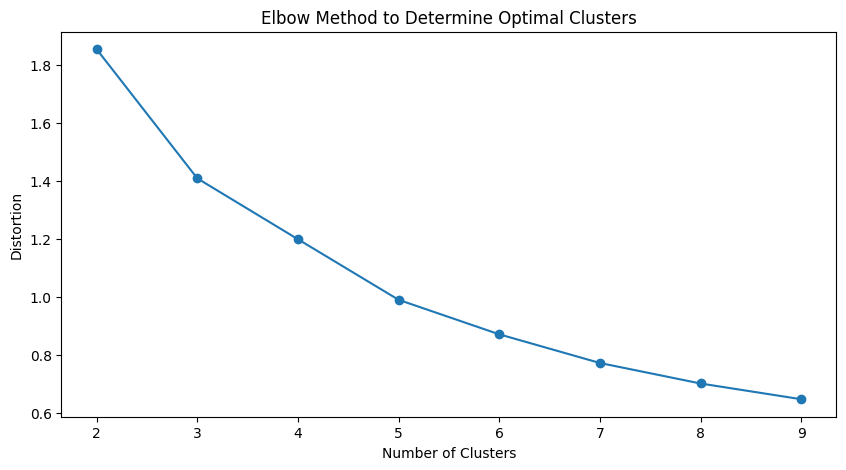

In [46]:
# Plot Elbow Curve
plt.figure(figsize=(10, 5))
plt.plot(k_range, distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method to Determine Optimal Clusters')
plt.show()




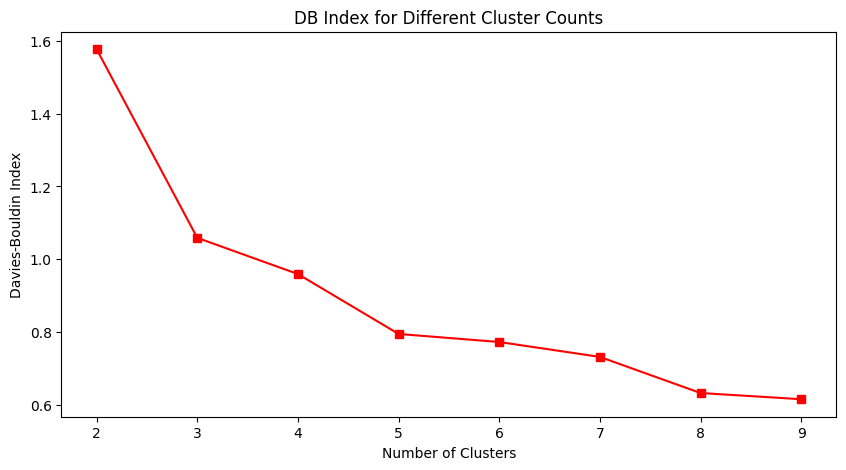

In [47]:
# Plot Davies-Bouldin Index (Lower is Better)
plt.figure(figsize=(10, 5))
plt.plot(k_range, db_scores, marker='s', color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.title('DB Index for Different Cluster Counts')
plt.show()

In [48]:
# 2️. Apply Clustering Using Optimal Cluster Count
optimal_k = k_range[np.argmin(db_scores)]
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(clustering_data_scaled)


In [50]:
from sklearn.metrics import silhouette_score


In [51]:
# 3️. Evaluate Clustering Quality
db_index = davies_bouldin_score(clustering_data_scaled, kmeans_labels)
silhouette_avg = silhouette_score(clustering_data_scaled, kmeans_labels)
print(f"Optimal Clusters: {optimal_k}")
print(f"Davies-Bouldin Index: {db_index}")
print(f"Silhouette Score: {silhouette_avg}")


Optimal Clusters: 9
Davies-Bouldin Index: 0.6145771572982154
Silhouette Score: 0.5280041897581105


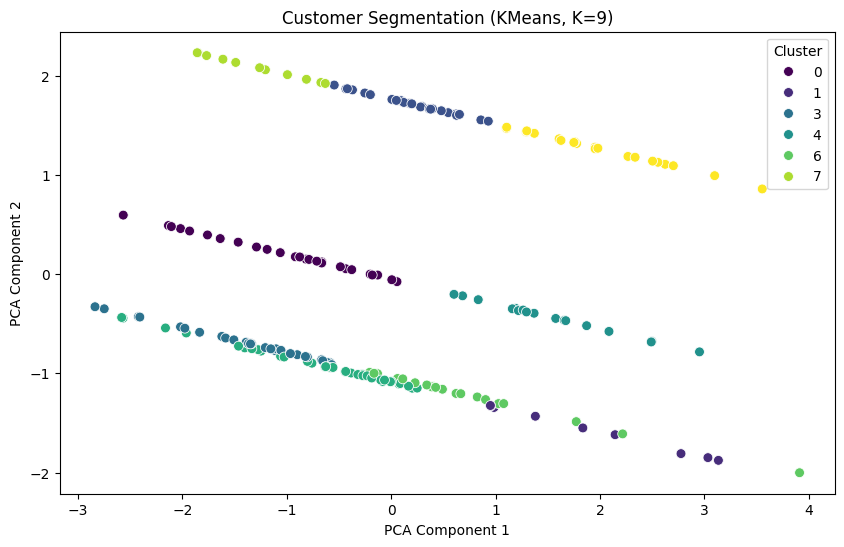

In [52]:
# 4️. PCA for Visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(clustering_data_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=kmeans_labels, palette='viridis', s=50)
plt.title(f"Customer Segmentation (KMeans, K={optimal_k})")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

In [54]:
# 5. Save Results
customer_profiles['Cluster'] = kmeans_labels
customer_profiles[['CustomerID', 'Cluster']].to_csv('/content/Niharika_Jain_Clustering.csv', index=False)
print("Clustering results saved to //content/Niharika_Jain_Clustering.csv")

Clustering results saved to //content/Niharika_Jain_Clustering.csv
